# Neural Networks - Bank Customer Chrun Prediction

## Problem Statement:
* Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?

* Context: Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a
customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

## Data Description:
* The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Know your data: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling.

### Dataset columns:

* RowNumber
* CustomerId
* Surname
* CreditScore
* Geography
* Gender
* Age
* Tenure
* Balance
* NumOfProducts - How many accounts, bank account affiliated products the person has
* HasCrCard - Does the customer have a credit card through the bank?
* IsActiveMember - Subjective, but for the concept
* EstimatedSalary
* Exited - Did they leave the bank after all?

## Q1) Read the data set

In [1]:
import os 
print(os.getcwd())

C:\Users\Venkatesh K Govindan\PGP-AIML\Project\Residency-6\Intro-to-Neural-Networks


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid', palette='spring', rc={'figure.figsize':(8,6)})

import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [3]:
bank_df=pd.read_csv('bank.csv')

In [4]:
bank_df.shape

(10000, 14)

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Q2) Drop the columns which are unique for all users like IDs (2.5 points)

#### * Setting CustomerId column as index for the dataframe and dropping RowNumber and Surname columns, as these are unique for all users 

In [7]:
bank_df.set_index('CustomerId', inplace=True)

In [8]:
bank_df.shape

(10000, 13)

In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
RowNumber          10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [10]:
bank_df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
bank_df.drop(['RowNumber', 'Surname'], axis=1, inplace=True)

In [12]:
bank_df.shape

(10000, 11)

In [13]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [14]:
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### * Verify for missing or NaN, incorrect data and duplicate data.

In [15]:
bank_df.shape

(10000, 11)

In [16]:
bank_df.drop_duplicates(keep='first', inplace=True)
bank_df.shape

(10000, 11)

#### * No duplicates.

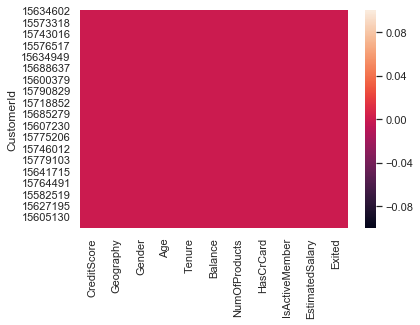

In [17]:
sns.heatmap(bank_df.isna())

In [18]:
bank_df.apply(lambda x : sum(x.isna()))

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### * No missing or NaN values.

## Q3) Distinguish the feature and target set (2.5 points)

In [19]:
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
X=bank_df.copy()
y=X.pop('Exited')

In [21]:
X.shape

(10000, 10)

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 859.4+ KB


In [23]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CustomerId,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [24]:
y.shape

(10000,)

In [25]:
y.head()

CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
Name: Exited, dtype: int64

#### * Encode columns with object type; Geography and Gender

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 859.4+ KB


In [27]:
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [28]:
print(X['Geography'].value_counts())
print(X['Geography'].value_counts().sum())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
10000


In [29]:
X['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [30]:
print(X['Gender'].value_counts())
print(X['Gender'].value_counts().sum())

Male      5457
Female    4543
Name: Gender, dtype: int64
10000


In [31]:
X=pd.get_dummies(X, drop_first=True, dtype=int)
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelenc1=LabelEncoder()
#X['Geography']=labelenc1.fit_transform(X['Geography'])
#labelenc2=LabelEncoder()
#X['Gender']=labelenc2.fit_transform(X['Gender'])

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Geography_Germany    10000 non-null int32
Geography_Spain      10000 non-null int32
Gender_Male          10000 non-null int32
dtypes: float64(2), int32(3), int64(6)
memory usage: 820.3 KB


In [33]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,0,0,0
15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,0
15619304,502,42,8,159660.80,3,1,0,113931.57,0,0,0
15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0
15737888,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [34]:
X.shape

(10000, 11)

In [35]:
import pandas_profiling as pp

In [36]:
pp.ProfileReport(X)

Number of variables,12
Number of observations,10000
Total Missing (%),0.0%
Total size in memory,820.4 KiB
Average record size in memory,84.0 B
Numeric,7
Categorical,0
Boolean,5
Date,0
Text (Unique),0
Rejected,0


In [37]:
import seaborn as sns
sns.set(style='darkgrid', palette='spring', rc={'figure.figsize':(8,6)})

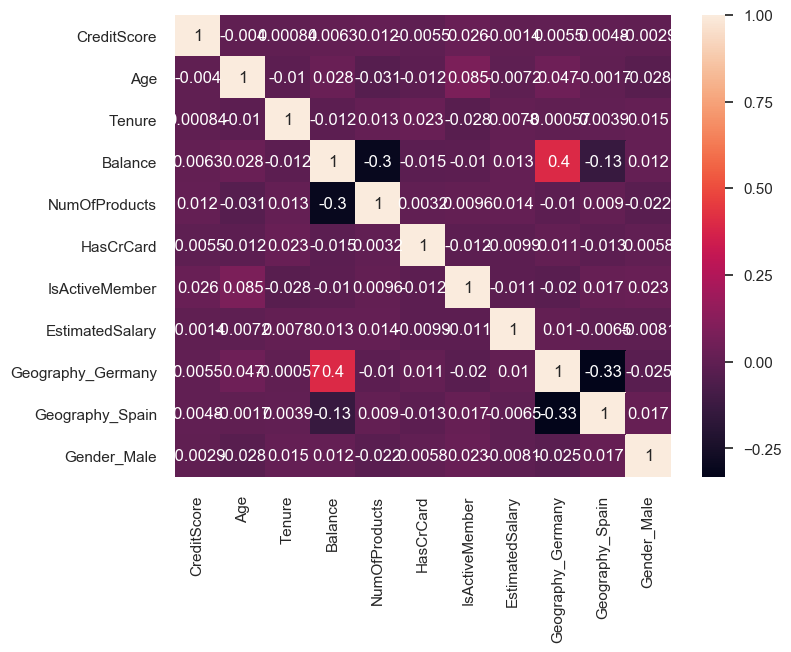

In [38]:
sns.heatmap(X.corr(),annot=True)

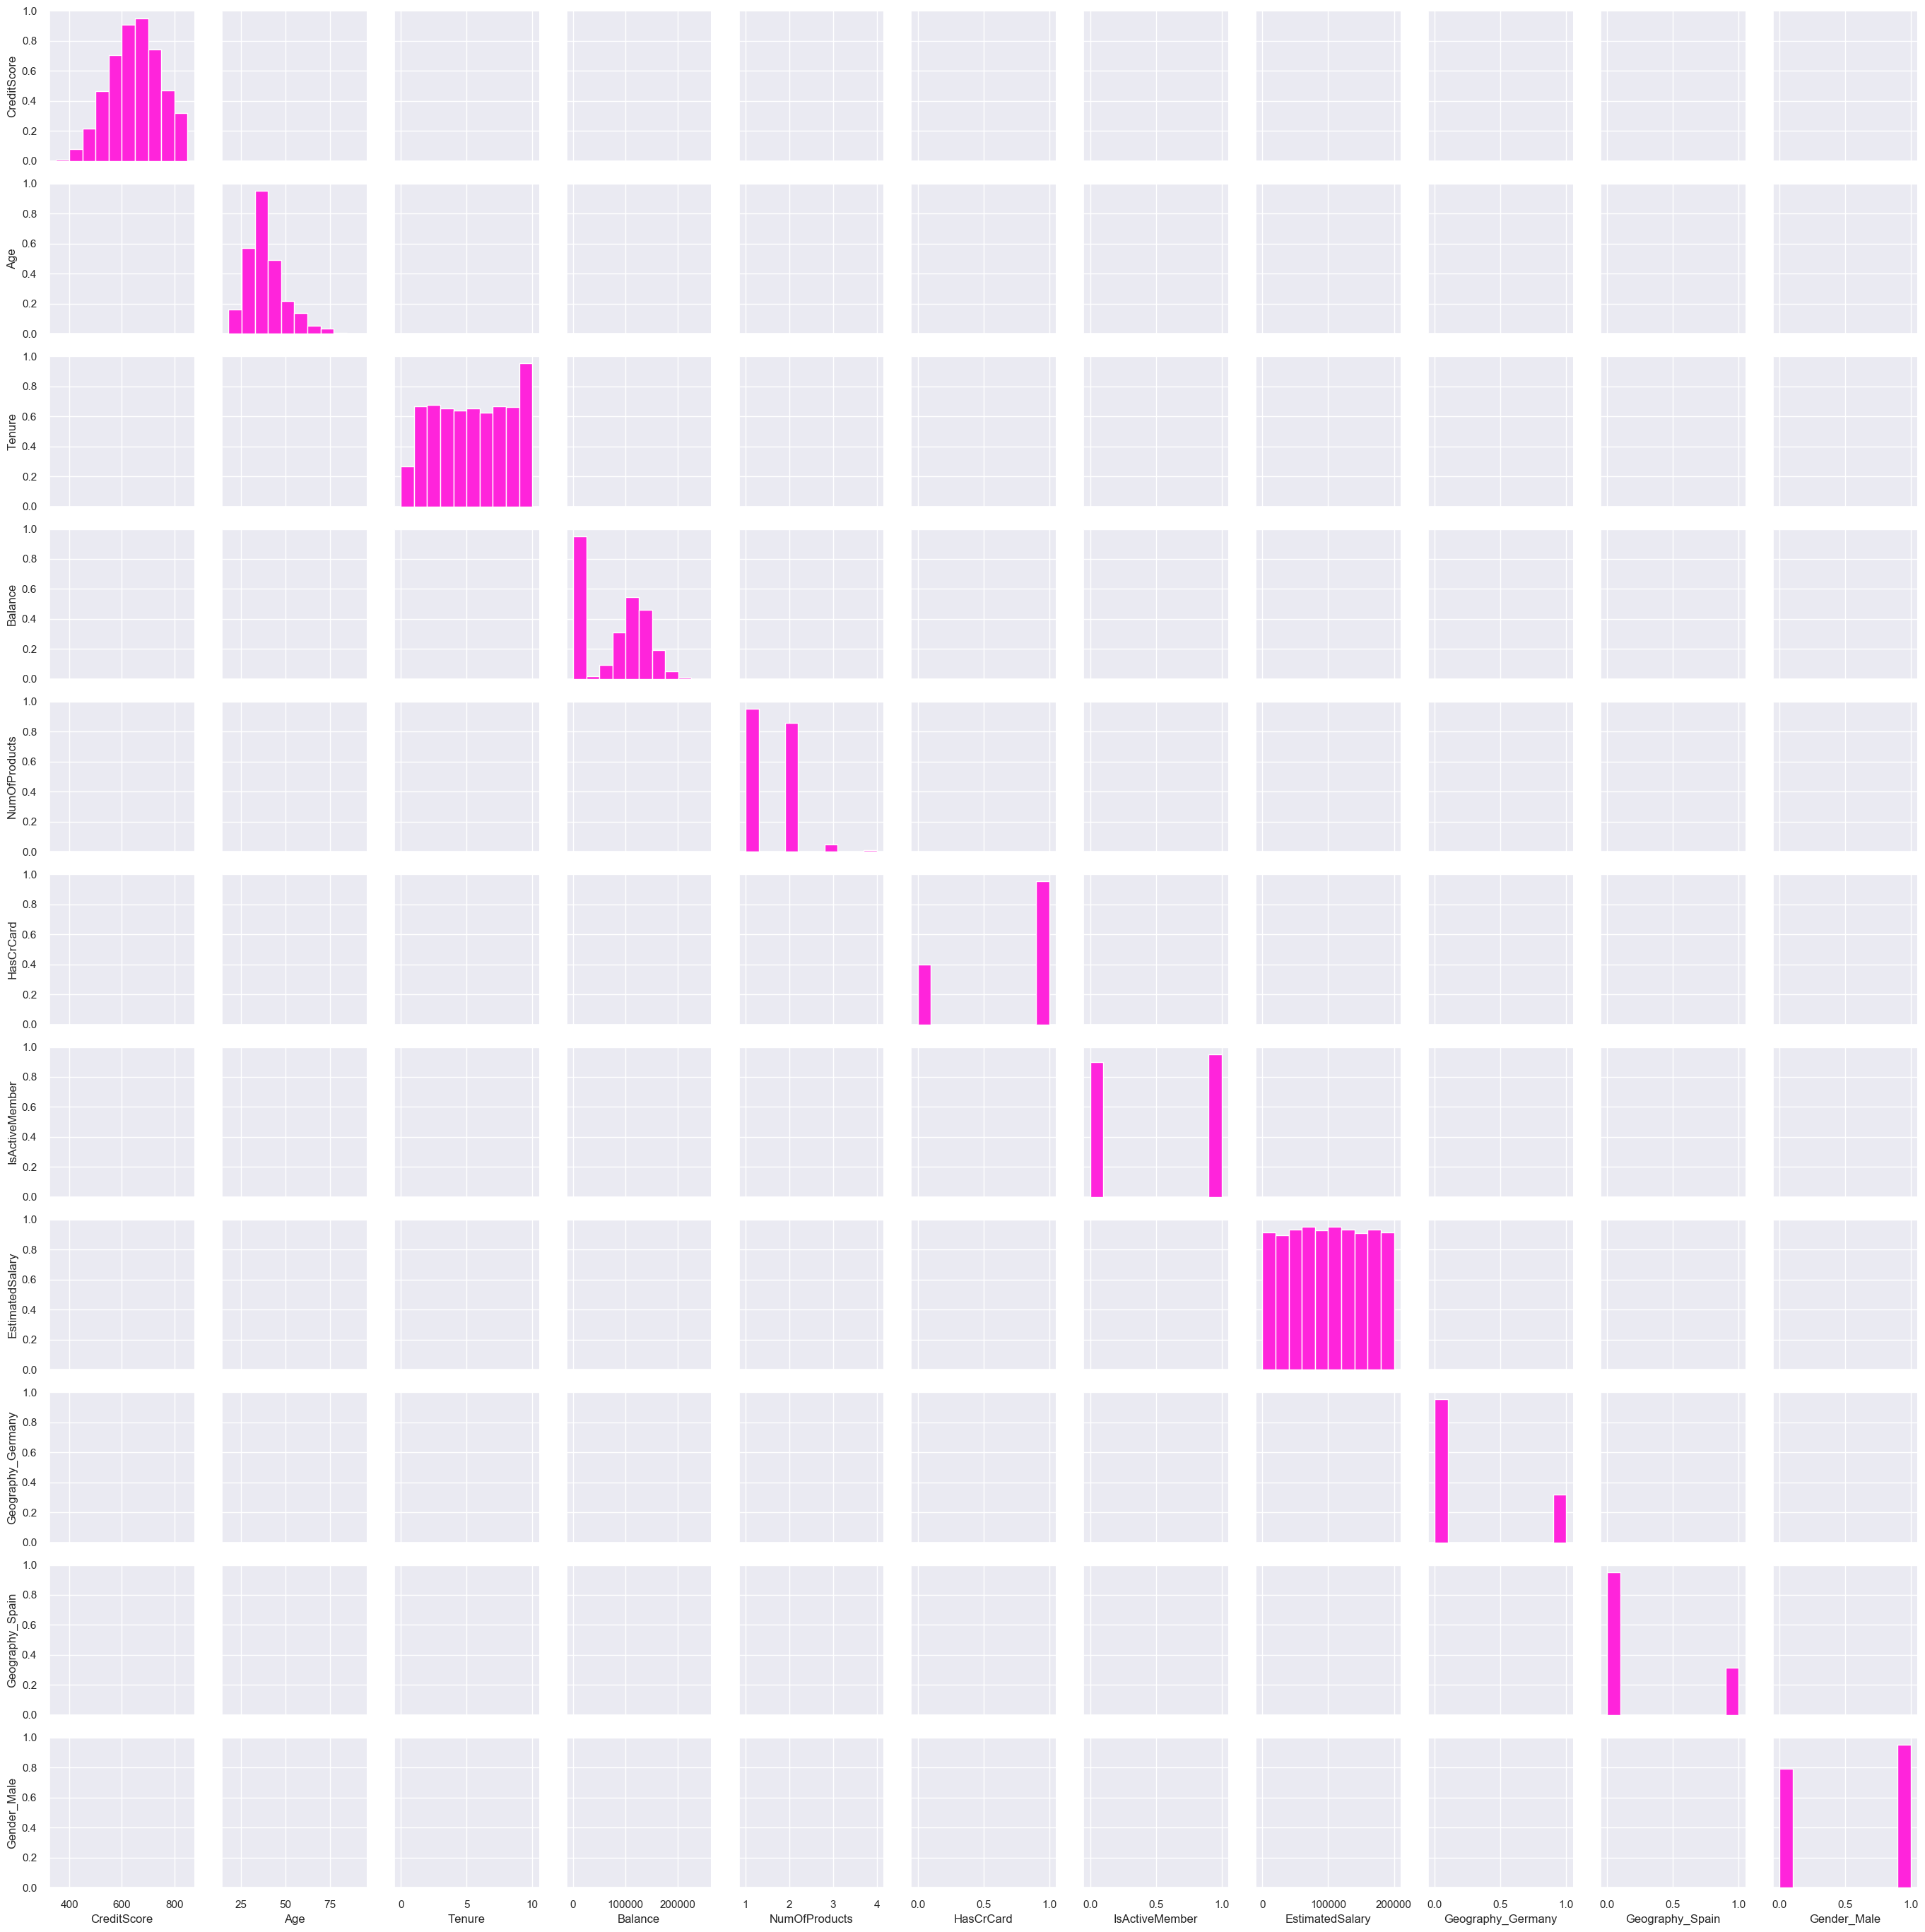

In [39]:
sns.pairplot(data=X, kind='kde')

#### * Observe that features are not highly correlated and data is normally and uniformly distributed.

## Q4) Divide the data set into training and test sets ( 2.5 points)

In [40]:
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [43]:
print(X_train.shape, '\n', y_train.shape)

(8000, 11) 
 (8000,)


In [44]:
print(X_test.shape, '\n', y_test.shape)

(2000, 11) 
 (2000,)


## Q5) Normalize the train and test data (5 points)

In [45]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,
15721585,628,29,3,113146.98,2,0,1,124749.08,1,0,1
15617790,626,29,4,105767.28,2,0,0,41104.82,0,0,0
15775905,612,47,6,130024.87,1,1,1,45750.21,1,0,0
15616666,646,52,6,111739.40,2,0,1,68367.18,1,0,0
15664720,714,33,8,122017.19,1,0,0,162515.17,0,1,1


In [46]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,
15655952,550,47,2,0.00,2,1,1,97057.28,0,0,1
15775293,680,34,3,143292.95,1,1,0,66526.01,0,0,1
15665088,531,42,2,0.00,2,0,1,90537.47,0,0,0
15720941,710,34,8,147833.30,2,0,1,1561.58,1,0,1
15733476,543,30,6,73481.05,1,1,1,176692.65,1,0,1


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [48]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
X_train[:5]

array([[-0.23082038, -0.94449979, -0.70174202,  0.58817274,  0.80225696,
        -1.55337352,  0.97725852,  0.42739449,  1.71490137, -0.57273139,
         0.91509065],
       [-0.25150912, -0.94449979, -0.35520275,  0.46984886,  0.80225696,
        -1.55337352, -1.02327069, -1.02548708, -0.58312392, -0.57273139,
        -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579,  0.85878772, -0.91150957,
         0.64376017,  0.97725852, -0.94479772,  1.71490137, -0.57273139,
        -1.09278791],
       [-0.04462173,  1.25262228,  0.33787579,  0.56560403,  0.80225696,
        -1.55337352,  0.97725852, -0.55194615,  1.71490137, -0.57273139,
        -1.09278791],
       [ 0.6587954 , -0.56239161,  1.03095433,  0.730395  , -0.91150957,
        -1.55337352, -1.02327069,  1.0833828 , -0.58312392,  1.74601919,
         0.91509065]])

In [50]:
X_test[:5]

array([[-1.03768121,  0.77498705, -1.0482813 , -1.22599173,  0.80225696,
         0.64376017,  0.97725852, -0.05360571, -0.58312392, -0.57273139,
         0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202,  1.07152411, -0.91150957,
         0.64376017, -1.02327069, -0.58392685, -0.58312392, -0.57273139,
         0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , -1.22599173,  0.80225696,
        -1.55337352,  0.97725852, -0.16685331, -0.58312392, -0.57273139,
        -1.09278791],
       [ 0.61741792, -0.46686456,  1.03095433,  1.14432271,  0.80225696,
        -1.55337352,  0.97725852, -1.71234407,  1.71490137, -0.57273139,
         0.91509065],
       [-1.11009179, -0.84897275,  0.33787579, -0.04781879, -0.91150957,
         0.64376017,  0.97725852,  1.32964236,  1.71490137, -0.57273139,
         0.91509065]])

## Q6) Initialize & build the model (10 points)

In [51]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score,precision_recall_curve,auc

Using TensorFlow backend.


In [52]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [53]:
tf.random.set_seed(0)

In [54]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [55]:
def build_classifier():
    model1=Sequential()
    model1.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
    model1.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
    model1.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model1
model1=KerasClassifier(build_fn=build_classifier,batch_size=10,epochs=100)
accuracies=cross_val_score(estimator=model1,X=X_train,y=y_train,cv=10,n_jobs=-1)

In [56]:
print(accuracies.mean())

0.8397499978542328


In [57]:
print(accuracies.std())

0.018462804137348167


### Evaluating the models performance using K-Fold Cross Validation method

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
def build_classifier(optimizer):
    model2=Sequential()
    model2.add(Dense(units=100,kernel_initializer='uniform',activation='relu',input_dim=11))
    model2.add(Dense(units=50,kernel_initializer='uniform',activation='relu'))
    model2.add(Dropout(0.2))
    model2.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    model2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model2
model2=KerasClassifier(build_fn=build_classifier)

In [60]:
parameters={
    'batch_size': [25,30],
    'epochs':[50, 100],
    'optimizer':['adam']
}

In [61]:
grid_search=GridSearchCV(estimator=model2,param_grid=parameters,scoring='accuracy',cv=10)

In [62]:
grid_search=grid_search.fit(X_train, y_train)

Epoch 1/50
7200/7200 [==============================] - 3s 447us/step - loss: 0.5558 - accuracy: 0.7976
Epoch 2/50
7200/7200 [==============================] - 3s 348us/step - loss: 0.4325 - accuracy: 0.7981
Epoch 3/50
7200/7200 [==============================] - 1s 89us/step - loss: 0.4216 - accuracy: 0.7981
Epoch 4/50
7200/7200 [==============================] - 1s 92us/step - loss: 0.4142 - accuracy: 0.7981
Epoch 5/50
7200/7200 [==============================] - 1s 93us/step - loss: 0.4080 - accuracy: 0.7981
Epoch 6/50
7200/7200 [==============================] - 1s 93us/step - loss: 0.4017 - accuracy: 0.8051
Epoch 7/50
7200/7200 [==============================] - 1s 94us/step - loss: 0.3957 - accuracy: 0.8281
Epoch 8/50
7200/7200 [==============================] - 1s 92us/step - loss: 0.3903 - accuracy: 0.8299
Epoch 9/50
7200/7200 [==============================] - 1s 95us/step - loss: 0.3858 - accuracy: 0.8317
Epoch 10/50
7200/7200 [==============================] - 1s 95us/step -

7200/7200 [==============================] - 1s 75us/step - loss: 0.4045 - accuracy: 0.8363
Epoch 30/50
7200/7200 [==============================] - 1s 90us/step - loss: 0.4042 - accuracy: 0.8367
Epoch 31/50
7200/7200 [==============================] - 1s 85us/step - loss: 0.4039 - accuracy: 0.8350
Epoch 32/50
7200/7200 [==============================] - 1s 87us/step - loss: 0.4039 - accuracy: 0.8360
Epoch 33/50
7200/7200 [==============================] - 1s 90us/step - loss: 0.4036 - accuracy: 0.8372
Epoch 34/50
7200/7200 [==============================] - 1s 88us/step - loss: 0.4032 - accuracy: 0.8360
Epoch 35/50
7200/7200 [==============================] - 1s 87us/step - loss: 0.4032 - accuracy: 0.8349
Epoch 36/50
7200/7200 [==============================] - 1s 88us/step - loss: 0.4028 - accuracy: 0.8356
Epoch 37/50
7200/7200 [==============================] - 1s 90us/step - loss: 0.4030 - accuracy: 0.8356
Epoch 38/50
7200/7200 [==============================] - 1s 95us/step - loss

Epoch 8/50
7200/7200 [==============================] - 1s 89us/step - loss: 0.4205 - accuracy: 0.8226
Epoch 9/50
7200/7200 [==============================] - 1s 91us/step - loss: 0.4195 - accuracy: 0.8265
Epoch 10/50
7200/7200 [==============================] - 1s 89us/step - loss: 0.4186 - accuracy: 0.8278
Epoch 11/50
7200/7200 [==============================] - 1s 89us/step - loss: 0.4175 - accuracy: 0.8301
Epoch 12/50
7200/7200 [==============================] - 1s 90us/step - loss: 0.4165 - accuracy: 0.8306
Epoch 13/50
7200/7200 [==============================] - 1s 100us/step - loss: 0.4162 - accuracy: 0.8297
Epoch 14/50
7200/7200 [==============================] - 1s 97us/step - loss: 0.4151 - accuracy: 0.8319
Epoch 15/50
7200/7200 [==============================] - 1s 96us/step - loss: 0.4144 - accuracy: 0.8328
Epoch 16/50
7200/7200 [==============================] - 1s 91us/step - loss: 0.4140 - accuracy: 0.8329
Epoch 17/50
7200/7200 [==============================] - 1s 90us/

7200/7200 [==============================] - 0s 68us/step - loss: 0.4048 - accuracy: 0.8354
Epoch 37/50
7200/7200 [==============================] - 1s 71us/step - loss: 0.4049 - accuracy: 0.8367
Epoch 38/50
7200/7200 [==============================] - 1s 137us/step - loss: 0.4049 - accuracy: 0.83690s - loss: 0.4042 - accu
Epoch 39/50
7200/7200 [==============================] - 3s 431us/step - loss: 0.4047 - accuracy: 0.8361
Epoch 40/50
7200/7200 [==============================] - 2s 224us/step - loss: 0.4043 - accuracy: 0.8360
Epoch 41/50
7200/7200 [==============================] - 1s 89us/step - loss: 0.4041 - accuracy: 0.8351
Epoch 42/50
7200/7200 [==============================] - 1s 91us/step - loss: 0.4039 - accuracy: 0.8363
Epoch 43/50
7200/7200 [==============================] - 1s 89us/step - loss: 0.4041 - accuracy: 0.8361
Epoch 44/50
7200/7200 [==============================] - 1s 91us/step - loss: 0.4039 - accuracy: 0.8353
Epoch 45/50
7200/7200 [==========================

7200/7200 [==============================] - 1s 81us/step - loss: 0.3610 - accuracy: 0.8515
Epoch 15/50
7200/7200 [==============================] - 1s 88us/step - loss: 0.3592 - accuracy: 0.8501
Epoch 16/50
7200/7200 [==============================] - 1s 88us/step - loss: 0.3580 - accuracy: 0.8524
Epoch 17/50
7200/7200 [==============================] - 1s 87us/step - loss: 0.3568 - accuracy: 0.8522
Epoch 18/50
7200/7200 [==============================] - 1s 87us/step - loss: 0.3556 - accuracy: 0.8546
Epoch 19/50
7200/7200 [==============================] - 1s 88us/step - loss: 0.3543 - accuracy: 0.8540
Epoch 20/50
7200/7200 [==============================] - 1s 90us/step - loss: 0.3536 - accuracy: 0.8532
Epoch 21/50
7200/7200 [==============================] - 1s 87us/step - loss: 0.3524 - accuracy: 0.8550
Epoch 22/50
7200/7200 [==============================] - 1s 94us/step - loss: 0.3516 - accuracy: 0.8568
Epoch 23/50
7200/7200 [==============================] - 1s 92us/step - loss

7200/7200 [==============================] - 3s 360us/step - loss: 0.4039 - accuracy: 0.8358
Epoch 43/50
7200/7200 [==============================] - 0s 52us/step - loss: 0.4040 - accuracy: 0.8351
Epoch 44/50
7200/7200 [==============================] - 1s 78us/step - loss: 0.4040 - accuracy: 0.8376
Epoch 45/50
7200/7200 [==============================] - 1s 84us/step - loss: 0.4038 - accuracy: 0.8354
Epoch 46/50
7200/7200 [==============================] - 1s 87us/step - loss: 0.4034 - accuracy: 0.8343
Epoch 47/50
7200/7200 [==============================] - 1s 87us/step - loss: 0.4040 - accuracy: 0.8353
Epoch 48/50
7200/7200 [==============================] - 1s 87us/step - loss: 0.4035 - accuracy: 0.8347
Epoch 49/50
7200/7200 [==============================] - 1s 86us/step - loss: 0.4036 - accuracy: 0.8354
Epoch 50/50
7200/7200 [==============================] - 1s 90us/step - loss: 0.4036 - accuracy: 0.8358
Epoch 1/50
7200/7200 [==============================] - 1s 182us/step - los

7200/7200 [==============================] - 1s 87us/step - loss: 0.4024 - accuracy: 0.8389
Epoch 21/50
7200/7200 [==============================] - 1s 86us/step - loss: 0.4025 - accuracy: 0.8400
Epoch 22/50
7200/7200 [==============================] - 1s 86us/step - loss: 0.4023 - accuracy: 0.8390
Epoch 23/50
7200/7200 [==============================] - 1s 89us/step - loss: 0.4014 - accuracy: 0.8379
Epoch 24/50
7200/7200 [==============================] - 1s 97us/step - loss: 0.4012 - accuracy: 0.8396
Epoch 25/50
7200/7200 [==============================] - 1s 98us/step - loss: 0.4011 - accuracy: 0.8394
Epoch 26/50
7200/7200 [==============================] - 1s 73us/step - loss: 0.4007 - accuracy: 0.8393
Epoch 27/50
7200/7200 [==============================] - 0s 64us/step - loss: 0.4006 - accuracy: 0.8390
Epoch 28/50
7200/7200 [==============================] - 0s 69us/step - loss: 0.4002 - accuracy: 0.8403
Epoch 29/50
7200/7200 [==============================] - 1s 88us/step - loss

7200/7200 [==============================] - 2s 291us/step - loss: 0.3993 - accuracy: 0.8357
Epoch 49/100
7200/7200 [==============================] - 3s 398us/step - loss: 0.3990 - accuracy: 0.8372
Epoch 50/100
7200/7200 [==============================] - 1s 106us/step - loss: 0.3994 - accuracy: 0.8360
Epoch 51/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3990 - accuracy: 0.8358
Epoch 52/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3992 - accuracy: 0.8365
Epoch 53/100
7200/7200 [==============================] - 1s 104us/step - loss: 0.3991 - accuracy: 0.8350
Epoch 54/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3988 - accuracy: 0.8364
Epoch 55/100
7200/7200 [==============================] - 1s 99us/step - loss: 0.3989 - accuracy: 0.8364
Epoch 56/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3989 - accuracy: 0.8372
Epoch 57/100
7200/7200 [==============================] - 1s 92u

7200/7200 [==============================] - 0s 48us/step - loss: 0.3962 - accuracy: 0.8358
Epoch 27/100
7200/7200 [==============================] - 0s 48us/step - loss: 0.3959 - accuracy: 0.8372
Epoch 28/100
7200/7200 [==============================] - 0s 59us/step - loss: 0.3959 - accuracy: 0.8369
Epoch 29/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3953 - accuracy: 0.8385
Epoch 30/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3954 - accuracy: 0.8376
Epoch 31/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3951 - accuracy: 0.8393
Epoch 32/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.3949 - accuracy: 0.8376
Epoch 33/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3949 - accuracy: 0.8369
Epoch 34/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3947 - accuracy: 0.8378
Epoch 35/100
7200/7200 [==============================] - 1s 91us/st

Epoch 4/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.4255 - accuracy: 0.7978
Epoch 5/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4229 - accuracy: 0.7978
Epoch 6/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4204 - accuracy: 0.7978
Epoch 7/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.4184 - accuracy: 0.7997
Epoch 8/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.4166 - accuracy: 0.8225
Epoch 9/100
7200/7200 [==============================] - 1s 202us/step - loss: 0.4156 - accuracy: 0.8265
Epoch 10/100
7200/7200 [==============================] - 3s 418us/step - loss: 0.4145 - accuracy: 0.8268
Epoch 11/100
7200/7200 [==============================] - 1s 183us/step - loss: 0.4136 - accuracy: 0.8290
Epoch 12/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4127 - accuracy: 0.8310
Epoch 13/100
7200/7200 [==============================] - 

Epoch 82/100
7200/7200 [==============================] - 2s 264us/step - loss: 0.3988 - accuracy: 0.8371
Epoch 83/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.3989 - accuracy: 0.8356
Epoch 84/100
7200/7200 [==============================] - 0s 49us/step - loss: 0.3991 - accuracy: 0.8357
Epoch 85/100
7200/7200 [==============================] - 0s 49us/step - loss: 0.3989 - accuracy: 0.8363
Epoch 86/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.3991 - accuracy: 0.8372
Epoch 87/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.3988 - accuracy: 0.8369
Epoch 88/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3991 - accuracy: 0.8346
Epoch 89/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.3988 - accuracy: 0.8358
Epoch 90/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.3989 - accuracy: 0.8356
Epoch 91/100
7200/7200 [==============================

7200/7200 [==============================] - 3s 388us/step - loss: 0.4047 - accuracy: 0.8340
Epoch 60/100
7200/7200 [==============================] - 1s 113us/step - loss: 0.4048 - accuracy: 0.8356
Epoch 61/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4043 - accuracy: 0.8340
Epoch 62/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4046 - accuracy: 0.8335
Epoch 63/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.4047 - accuracy: 0.8339
Epoch 64/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.4046 - accuracy: 0.8350
Epoch 65/100
7200/7200 [==============================] - 1s 107us/step - loss: 0.4044 - accuracy: 0.8353
Epoch 66/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4043 - accuracy: 0.8343
Epoch 67/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4048 - accuracy: 0.8343
Epoch 68/100
7200/7200 [==============================] - 1s 98us

7200/7200 [==============================] - 0s 52us/step - loss: 0.4031 - accuracy: 0.8363
Epoch 37/100
7200/7200 [==============================] - 0s 64us/step - loss: 0.4024 - accuracy: 0.8374
Epoch 38/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.4019 - accuracy: 0.8365
Epoch 39/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4011 - accuracy: 0.8367
Epoch 40/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.4007 - accuracy: 0.8369
Epoch 41/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.4001 - accuracy: 0.8365
Epoch 42/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.3997 - accuracy: 0.8378
Epoch 43/100
7200/7200 [==============================] - 0s 50us/step - loss: 0.3992 - accuracy: 0.8376
Epoch 44/100
7200/7200 [==============================] - 0s 59us/step - loss: 0.3982 - accuracy: 0.8364
Epoch 45/100
7200/7200 [==============================] - 1s 92us/st

7200/7200 [==============================] - 3s 382us/step - loss: 0.3978 - accuracy: 0.8371
Epoch 14/100
7200/7200 [==============================] - 2s 239us/step - loss: 0.3964 - accuracy: 0.8374
Epoch 15/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.3956 - accuracy: 0.8378
Epoch 16/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.3955 - accuracy: 0.8376
Epoch 17/100
7200/7200 [==============================] - 0s 57us/step - loss: 0.3947 - accuracy: 0.8385
Epoch 18/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.3942 - accuracy: 0.8383
Epoch 19/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.3934 - accuracy: 0.8390
Epoch 20/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3933 - accuracy: 0.8389
Epoch 21/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.3927 - accuracy: 0.8383
Epoch 22/100
7200/7200 [==============================] - 1s 82us/

7200/7200 [==============================] - 1s 92us/step - loss: 0.3850 - accuracy: 0.8422
Epoch 91/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3854 - accuracy: 0.8410
Epoch 92/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.3846 - accuracy: 0.8433
Epoch 93/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3847 - accuracy: 0.8429
Epoch 94/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3849 - accuracy: 0.8426
Epoch 95/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3841 - accuracy: 0.8446
Epoch 96/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3843 - accuracy: 0.8417
Epoch 97/100
7200/7200 [==============================] - 1s 85us/step - loss: 0.3844 - accuracy: 0.8425
Epoch 98/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.3848 - accuracy: 0.8417
Epoch 99/100
7200/7200 [==============================] - 1s 75us/st

Epoch 68/100
7200/7200 [==============================] - 1s 136us/step - loss: 0.3426 - accuracy: 0.8590
Epoch 69/100
7200/7200 [==============================] - 3s 470us/step - loss: 0.3426 - accuracy: 0.86042s - loss: 0.3427 
Epoch 70/100
7200/7200 [==============================] - 1s 205us/step - loss: 0.3428 - accuracy: 0.8590
Epoch 71/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.3427 - accuracy: 0.8575
Epoch 72/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.3423 - accuracy: 0.8590
Epoch 73/100
7200/7200 [==============================] - 1s 98us/step - loss: 0.3419 - accuracy: 0.8599
Epoch 74/100
7200/7200 [==============================] - 1s 97us/step - loss: 0.3411 - accuracy: 0.8610
Epoch 75/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.3427 - accuracy: 0.8585
Epoch 76/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.3413 - accuracy: 0.8594
Epoch 77/100
7200/7200 [==========

7200/7200 [==============================] - 0s 52us/step - loss: 0.4039 - accuracy: 0.8357
Epoch 46/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4036 - accuracy: 0.8357
Epoch 47/100
7200/7200 [==============================] - 0s 68us/step - loss: 0.4037 - accuracy: 0.8360
Epoch 48/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4036 - accuracy: 0.8351
Epoch 49/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4038 - accuracy: 0.8361
Epoch 50/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4036 - accuracy: 0.8369
Epoch 51/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4032 - accuracy: 0.8364
Epoch 52/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4032 - accuracy: 0.8349
Epoch 53/100
7200/7200 [==============================] - 1s 92us/step - loss: 0.4030 - accuracy: 0.8354
Epoch 54/100
7200/7200 [==============================] - 1s 90us/st

7200/7200 [==============================] - 1s 88us/step - loss: 0.4112 - accuracy: 0.8346
Epoch 23/100
7200/7200 [==============================] - 1s 91us/step - loss: 0.4108 - accuracy: 0.8360
Epoch 24/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4107 - accuracy: 0.8350
Epoch 25/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4101 - accuracy: 0.8343
Epoch 26/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.4097 - accuracy: 0.8343
Epoch 27/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.4097 - accuracy: 0.8344
Epoch 28/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4091 - accuracy: 0.8350
Epoch 29/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4090 - accuracy: 0.8358
Epoch 30/100
7200/7200 [==============================] - 1s 96us/step - loss: 0.4086 - accuracy: 0.8357
Epoch 31/100
7200/7200 [==============================] - 1s 89us/st

7200/7200 [==============================] - 1s 80us/step - loss: 0.4041 - accuracy: 0.8357
Epoch 100/100
7200/7200 [==============================] - 0s 66us/step - loss: 0.4038 - accuracy: 0.8369
Epoch 1/100
7200/7200 [==============================] - 1s 169us/step - loss: 0.5707 - accuracy: 0.7985
Epoch 2/100
7200/7200 [==============================] - 1s 90us/step - loss: 0.4320 - accuracy: 0.7993
Epoch 3/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4257 - accuracy: 0.7993
Epoch 4/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.4224 - accuracy: 0.7993
Epoch 5/100
7200/7200 [==============================] - 1s 95us/step - loss: 0.4191 - accuracy: 0.7993
Epoch 6/100
7200/7200 [==============================] - 1s 93us/step - loss: 0.4165 - accuracy: 0.7993
Epoch 7/100
7200/7200 [==============================] - 1s 94us/step - loss: 0.4144 - accuracy: 0.8126
Epoch 8/100
7200/7200 [==============================] - 1s 95us/step - l

7200/7200 [==============================] - 1s 80us/step - loss: 0.3954 - accuracy: 0.8393
Epoch 78/100
7200/7200 [==============================] - 3s 483us/step - loss: 0.3955 - accuracy: 0.8401
Epoch 79/100
7200/7200 [==============================] - 2s 242us/step - loss: 0.3955 - accuracy: 0.8406
Epoch 80/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.3955 - accuracy: 0.8393
Epoch 81/100
7200/7200 [==============================] - 2s 315us/step - loss: 0.3957 - accuracy: 0.8390
Epoch 82/100
7200/7200 [==============================] - 3s 395us/step - loss: 0.3955 - accuracy: 0.8392
Epoch 83/100
7200/7200 [==============================] - 2s 251us/step - loss: 0.3956 - accuracy: 0.8393
Epoch 84/100
7200/7200 [==============================] - 3s 434us/step - loss: 0.3955 - accuracy: 0.8400
Epoch 85/100
7200/7200 [==============================] - 1s 122us/step - loss: 0.3951 - accuracy: 0.8399
Epoch 86/100
7200/7200 [==============================] - 0s 

7200/7200 [==============================] - 0s 58us/step - loss: 0.4270 - accuracy: 0.7979
Epoch 5/50
7200/7200 [==============================] - 1s 72us/step - loss: 0.4229 - accuracy: 0.7992
Epoch 6/50
7200/7200 [==============================] - 1s 80us/step - loss: 0.4183 - accuracy: 0.8243
Epoch 7/50
7200/7200 [==============================] - 1s 76us/step - loss: 0.4145 - accuracy: 0.8289
Epoch 8/50
7200/7200 [==============================] - 1s 76us/step - loss: 0.4111 - accuracy: 0.8331
Epoch 9/50
7200/7200 [==============================] - 1s 79us/step - loss: 0.4088 - accuracy: 0.8360
Epoch 10/50
7200/7200 [==============================] - 1s 82us/step - loss: 0.4066 - accuracy: 0.8382
Epoch 11/50
7200/7200 [==============================] - 1s 80us/step - loss: 0.4054 - accuracy: 0.8376
Epoch 12/50
7200/7200 [==============================] - 0s 65us/step - loss: 0.4037 - accuracy: 0.8379
Epoch 13/50
7200/7200 [==============================] - 0s 43us/step - loss: 0.4

7200/7200 [==============================] - 0s 58us/step - loss: 0.3557 - accuracy: 0.8544
Epoch 33/50
7200/7200 [==============================] - 1s 79us/step - loss: 0.3551 - accuracy: 0.8535
Epoch 34/50
7200/7200 [==============================] - 1s 76us/step - loss: 0.3546 - accuracy: 0.8543
Epoch 35/50
7200/7200 [==============================] - 1s 76us/step - loss: 0.3540 - accuracy: 0.8546
Epoch 36/50
7200/7200 [==============================] - 0s 52us/step - loss: 0.3538 - accuracy: 0.8544
Epoch 37/50
7200/7200 [==============================] - 0s 58us/step - loss: 0.3529 - accuracy: 0.8532
Epoch 38/50
7200/7200 [==============================] - 1s 71us/step - loss: 0.3525 - accuracy: 0.8549
Epoch 39/50
7200/7200 [==============================] - 1s 78us/step - loss: 0.3520 - accuracy: 0.8546
Epoch 40/50
7200/7200 [==============================] - 1s 79us/step - loss: 0.3523 - accuracy: 0.8568
Epoch 41/50
7200/7200 [==============================] - 1s 78us/step - loss

7200/7200 [==============================] - 1s 86us/step - loss: 0.4216 - accuracy: 0.7982
Epoch 10/50
7200/7200 [==============================] - 1s 77us/step - loss: 0.4200 - accuracy: 0.8185
Epoch 11/50
7200/7200 [==============================] - 1s 81us/step - loss: 0.4186 - accuracy: 0.8207
Epoch 12/50
7200/7200 [==============================] - 1s 78us/step - loss: 0.4173 - accuracy: 0.8226
Epoch 13/50
7200/7200 [==============================] - 1s 78us/step - loss: 0.4166 - accuracy: 0.8263
Epoch 14/50
7200/7200 [==============================] - 1s 77us/step - loss: 0.4158 - accuracy: 0.8292
Epoch 15/50
7200/7200 [==============================] - ETA: 0s - loss: 0.4150 - accuracy: 0.82 - 1s 77us/step - loss: 0.4149 - accuracy: 0.8294
Epoch 16/50
7200/7200 [==============================] - 1s 75us/step - loss: 0.4144 - accuracy: 0.8306
Epoch 17/50
7200/7200 [==============================] - 1s 77us/step - loss: 0.4136 - accuracy: 0.8315
Epoch 18/50
7200/7200 [===========

7200/7200 [==============================] - 0s 48us/step - loss: 0.3980 - accuracy: 0.8385
Epoch 37/50
7200/7200 [==============================] - 0s 53us/step - loss: 0.3976 - accuracy: 0.8386
Epoch 38/50
7200/7200 [==============================] - 0s 51us/step - loss: 0.3975 - accuracy: 0.8378
Epoch 39/50
7200/7200 [==============================] - 0s 50us/step - loss: 0.3977 - accuracy: 0.8382
Epoch 40/50
7200/7200 [==============================] - 0s 50us/step - loss: 0.3969 - accuracy: 0.8381
Epoch 41/50
7200/7200 [==============================] - 3s 377us/step - loss: 0.3971 - accuracy: 0.8385
Epoch 42/50
7200/7200 [==============================] - 2s 338us/step - loss: 0.3970 - accuracy: 0.8379
Epoch 43/50
7200/7200 [==============================] - 0s 55us/step - loss: 0.3968 - accuracy: 0.8388
Epoch 44/50
7200/7200 [==============================] - 0s 52us/step - loss: 0.3968 - accuracy: 0.8376
Epoch 45/50
7200/7200 [==============================] - 0s 53us/step - lo

7200/7200 [==============================] - 0s 49us/step - loss: 0.4146 - accuracy: 0.8326
Epoch 15/50
7200/7200 [==============================] - 0s 42us/step - loss: 0.4136 - accuracy: 0.8332
Epoch 16/50
7200/7200 [==============================] - 0s 47us/step - loss: 0.4128 - accuracy: 0.8325
Epoch 17/50
7200/7200 [==============================] - 0s 46us/step - loss: 0.4122 - accuracy: 0.8333
Epoch 18/50
7200/7200 [==============================] - 0s 45us/step - loss: 0.4117 - accuracy: 0.8332
Epoch 19/50
7200/7200 [==============================] - 0s 44us/step - loss: 0.4109 - accuracy: 0.8350
Epoch 20/50
7200/7200 [==============================] - 0s 49us/step - loss: 0.4105 - accuracy: 0.8346
Epoch 21/50
7200/7200 [==============================] - 0s 42us/step - loss: 0.4100 - accuracy: 0.8353
Epoch 22/50
7200/7200 [==============================] - 0s 44us/step - loss: 0.4094 - accuracy: 0.8350
Epoch 23/50
7200/7200 [==============================] - 0s 45us/step - loss

7200/7200 [==============================] - 0s 46us/step - loss: 0.3505 - accuracy: 0.8565
Epoch 42/50
7200/7200 [==============================] - 0s 52us/step - loss: 0.3507 - accuracy: 0.8574
Epoch 43/50
7200/7200 [==============================] - 0s 50us/step - loss: 0.3506 - accuracy: 0.8575
Epoch 44/50
7200/7200 [==============================] - 0s 51us/step - loss: 0.3513 - accuracy: 0.8562
Epoch 45/50
7200/7200 [==============================] - 0s 46us/step - loss: 0.3493 - accuracy: 0.8600
Epoch 46/50
7200/7200 [==============================] - 0s 48us/step - loss: 0.3499 - accuracy: 0.8571
Epoch 47/50
7200/7200 [==============================] - 0s 46us/step - loss: 0.3497 - accuracy: 0.8556
Epoch 48/50
7200/7200 [==============================] - 0s 49us/step - loss: 0.3501 - accuracy: 0.8561
Epoch 49/50
7200/7200 [==============================] - 0s 48us/step - loss: 0.3498 - accuracy: 0.8543
Epoch 50/50
7200/7200 [==============================] - 0s 48us/step - loss

7200/7200 [==============================] - 2s 313us/step - loss: 0.4085 - accuracy: 0.8354
Epoch 19/100
7200/7200 [==============================] - 1s 108us/step - loss: 0.4080 - accuracy: 0.8353
Epoch 20/100
7200/7200 [==============================] - 0s 46us/step - loss: 0.4075 - accuracy: 0.8364
Epoch 21/100
7200/7200 [==============================] - 0s 42us/step - loss: 0.4071 - accuracy: 0.8360
Epoch 22/100
7200/7200 [==============================] - 0s 43us/step - loss: 0.4066 - accuracy: 0.8361
Epoch 23/100
7200/7200 [==============================] - 0s 49us/step - loss: 0.4063 - accuracy: 0.8372
Epoch 24/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.4063 - accuracy: 0.8361
Epoch 25/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.4055 - accuracy: 0.8358
Epoch 26/100
7200/7200 [==============================] - 1s 87us/step - loss: 0.4052 - accuracy: 0.8363
Epoch 27/100
7200/7200 [==============================] - 0s 62us/

7200/7200 [==============================] - 2s 312us/step - loss: 0.3941 - accuracy: 0.8392
Epoch 96/100
7200/7200 [==============================] - 0s 48us/step - loss: 0.3942 - accuracy: 0.8393
Epoch 97/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.3941 - accuracy: 0.8392
Epoch 98/100
7200/7200 [==============================] - 1s 178us/step - loss: 0.3943 - accuracy: 0.8386
Epoch 99/100
7200/7200 [==============================] - 2s 324us/step - loss: 0.3946 - accuracy: 0.8397
Epoch 100/100
7200/7200 [==============================] - 2s 259us/step - loss: 0.3944 - accuracy: 0.8401
Epoch 1/100
7200/7200 [==============================] - 2s 277us/step - loss: 0.6257 - accuracy: 0.7965
Epoch 2/100
7200/7200 [==============================] - 3s 397us/step - loss: 0.4551 - accuracy: 0.7979: 0s - loss: 0.4558 - accuracy: 0.79
Epoch 3/100
7200/7200 [==============================] - 1s 177us/step - loss: 0.4323 - accuracy: 0.7979
Epoch 4/100
7200/7200 [====

7200/7200 [==============================] - 1s 74us/step - loss: 0.3918 - accuracy: 0.8386
Epoch 72/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.3917 - accuracy: 0.8389
Epoch 73/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.3914 - accuracy: 0.8396
Epoch 74/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.3913 - accuracy: 0.8400
Epoch 75/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.3915 - accuracy: 0.8389
Epoch 76/100
7200/7200 [==============================] - 1s 73us/step - loss: 0.3913 - accuracy: 0.8413
Epoch 77/100
7200/7200 [==============================] - 1s 73us/step - loss: 0.3915 - accuracy: 0.8390
Epoch 78/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.3914 - accuracy: 0.8401
Epoch 79/100
7200/7200 [==============================] - 1s 73us/step - loss: 0.3913 - accuracy: 0.8411
Epoch 80/100
7200/7200 [==============================] - 0s 69us/st

7200/7200 [==============================] - 1s 70us/step - loss: 0.4025 - accuracy: 0.8367
Epoch 50/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.4023 - accuracy: 0.8379
Epoch 51/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.4025 - accuracy: 0.8365
Epoch 52/100
7200/7200 [==============================] - 1s 70us/step - loss: 0.4021 - accuracy: 0.8365
Epoch 53/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.4020 - accuracy: 0.8371
Epoch 54/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.4019 - accuracy: 0.8363
Epoch 55/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.4019 - accuracy: 0.8360
Epoch 56/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.4015 - accuracy: 0.8378
Epoch 57/100
7200/7200 [==============================] - 1s 73us/step - loss: 0.4016 - accuracy: 0.8369
Epoch 58/100
7200/7200 [==============================] - 0s 57us/st

7200/7200 [==============================] - 1s 71us/step - loss: 0.4094 - accuracy: 0.8319
Epoch 28/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.4090 - accuracy: 0.8342
Epoch 29/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.4088 - accuracy: 0.8328
Epoch 30/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.4085 - accuracy: 0.8332
Epoch 31/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.4081 - accuracy: 0.8336
Epoch 32/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.4075 - accuracy: 0.8343
Epoch 33/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.4080 - accuracy: 0.8342
Epoch 34/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.4074 - accuracy: 0.8339
Epoch 35/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.4075 - accuracy: 0.8336
Epoch 36/100
7200/7200 [==============================] - 1s 79us/st

7200/7200 [==============================] - 1s 74us/step - loss: 0.4198 - accuracy: 0.8156
Epoch 6/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.4158 - accuracy: 0.8288
Epoch 7/100
7200/7200 [==============================] - 1s 70us/step - loss: 0.4124 - accuracy: 0.8344
Epoch 8/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.4098 - accuracy: 0.8354
Epoch 9/100
7200/7200 [==============================] - 1s 80us/step - loss: 0.4076 - accuracy: 0.8353
Epoch 10/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.4060 - accuracy: 0.8354
Epoch 11/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.4044 - accuracy: 0.8358
Epoch 12/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.4032 - accuracy: 0.8368
Epoch 13/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.4023 - accuracy: 0.8376
Epoch 14/100
7200/7200 [==============================] - 1s 74us/step -

7200/7200 [==============================] - 1s 75us/step - loss: 0.3924 - accuracy: 0.8410
Epoch 84/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.3927 - accuracy: 0.8393
Epoch 85/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.3930 - accuracy: 0.8403
Epoch 86/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.3925 - accuracy: 0.8413
Epoch 87/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.3925 - accuracy: 0.8424
Epoch 88/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.3926 - accuracy: 0.8421
Epoch 89/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.3924 - accuracy: 0.8413
Epoch 90/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.3930 - accuracy: 0.8394
Epoch 91/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.3924 - accuracy: 0.8407
Epoch 92/100
7200/7200 [==============================] - 1s 77us/st

7200/7200 [==============================] - 0s 54us/step - loss: 0.3882 - accuracy: 0.8397
Epoch 62/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.3883 - accuracy: 0.8422
Epoch 63/100
7200/7200 [==============================] - 0s 48us/step - loss: 0.3881 - accuracy: 0.8414
Epoch 64/100
7200/7200 [==============================] - 0s 45us/step - loss: 0.3882 - accuracy: 0.8408
Epoch 65/100
7200/7200 [==============================] - 2s 227us/step - loss: 0.3880 - accuracy: 0.8422
Epoch 66/100
7200/7200 [==============================] - 2s 323us/step - loss: 0.3880 - accuracy: 0.8419
Epoch 67/100
7200/7200 [==============================] - 1s 201us/step - loss: 0.3883 - accuracy: 0.8418
Epoch 68/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.3878 - accuracy: 0.8428
Epoch 69/100
7200/7200 [==============================] - 0s 48us/step - loss: 0.3877 - accuracy: 0.8415
Epoch 70/100
7200/7200 [==============================] - 0s 44us

7200/7200 [==============================] - 0s 48us/step - loss: 0.4064 - accuracy: 0.8350
Epoch 39/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.4061 - accuracy: 0.8353
Epoch 40/100
7200/7200 [==============================] - 0s 45us/step - loss: 0.4055 - accuracy: 0.8353
Epoch 41/100
7200/7200 [==============================] - 0s 42us/step - loss: 0.4045 - accuracy: 0.8365
Epoch 42/100
7200/7200 [==============================] - 0s 45us/step - loss: 0.4040 - accuracy: 0.8347
Epoch 43/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.4033 - accuracy: 0.8372
Epoch 44/100
7200/7200 [==============================] - 0s 57us/step - loss: 0.4033 - accuracy: 0.8357
Epoch 45/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.4025 - accuracy: 0.8339
Epoch 46/100
7200/7200 [==============================] - 2s 338us/step - loss: 0.4015 - accuracy: 0.8350 - ETA: 0s - loss:
Epoch 47/100
7200/7200 [=========================

7200/7200 [==============================] - 0s 64us/step - loss: 0.4142 - accuracy: 0.8324
Epoch 15/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.4136 - accuracy: 0.8340
Epoch 16/100
7200/7200 [==============================] - 1s 88us/step - loss: 0.4130 - accuracy: 0.8338
Epoch 17/100
7200/7200 [==============================] - 3s 453us/step - loss: 0.4123 - accuracy: 0.83492s - loss: 0.4086 - accuracy:  - ETA: 2s - l
Epoch 18/100
7200/7200 [==============================] - 2s 238us/step - loss: 0.4114 - accuracy: 0.8344
Epoch 19/100
7200/7200 [==============================] - 0s 49us/step - loss: 0.4109 - accuracy: 0.8358
Epoch 20/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.4106 - accuracy: 0.8351
Epoch 21/100
7200/7200 [==============================] - 1s 81us/step - loss: 0.4096 - accuracy: 0.8349
Epoch 22/100
7200/7200 [==============================] - 1s 79us/step - loss: 0.4092 - accuracy: 0.8344
Epoch 23/100
7200/7200

7200/7200 [==============================] - 1s 91us/step - loss: 0.4008 - accuracy: 0.8340
Epoch 92/100
7200/7200 [==============================] - 3s 475us/step - loss: 0.4009 - accuracy: 0.83580s - l
Epoch 93/100
7200/7200 [==============================] - 2s 211us/step - loss: 0.4008 - accuracy: 0.8350
Epoch 94/100
7200/7200 [==============================] - 0s 57us/step - loss: 0.4010 - accuracy: 0.8342
Epoch 95/100
7200/7200 [==============================] - 0s 69us/step - loss: 0.4010 - accuracy: 0.8349
Epoch 96/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.4010 - accuracy: 0.8344
Epoch 97/100
7200/7200 [==============================] - 1s 78us/step - loss: 0.4007 - accuracy: 0.8326
Epoch 98/100
7200/7200 [==============================] - 1s 83us/step - loss: 0.4009 - accuracy: 0.8371
Epoch 99/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.4008 - accuracy: 0.8353
Epoch 100/100
7200/7200 [==============================] - 1

7200/7200 [==============================] - 0s 46us/step - loss: 0.4043 - accuracy: 0.8379
Epoch 66/100
7200/7200 [==============================] - 0s 45us/step - loss: 0.4044 - accuracy: 0.8379
Epoch 67/100
7200/7200 [==============================] - 0s 56us/step - loss: 0.4044 - accuracy: 0.8379
Epoch 68/100
7200/7200 [==============================] - 0s 57us/step - loss: 0.4044 - accuracy: 0.8386
Epoch 69/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4040 - accuracy: 0.8357
Epoch 70/100
7200/7200 [==============================] - 0s 55us/step - loss: 0.4040 - accuracy: 0.8371
Epoch 71/100
7200/7200 [==============================] - 2s 318us/step - loss: 0.4042 - accuracy: 0.83750s - loss: 0
Epoch 72/100
7200/7200 [==============================] - 3s 349us/step - loss: 0.4040 - accuracy: 0.8371
Epoch 73/100
7200/7200 [==============================] - 1s 108us/step - loss: 0.4041 - accuracy: 0.8372
Epoch 74/100
7200/7200 [=============================

7200/7200 [==============================] - 0s 42us/step - loss: 0.3983 - accuracy: 0.8394
Epoch 43/100
7200/7200 [==============================] - 0s 46us/step - loss: 0.3978 - accuracy: 0.8389
Epoch 44/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.3976 - accuracy: 0.8390
Epoch 45/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.3976 - accuracy: 0.8393
Epoch 46/100
7200/7200 [==============================] - 0s 48us/step - loss: 0.3975 - accuracy: 0.8399
Epoch 47/100
7200/7200 [==============================] - 1s 173us/step - loss: 0.3975 - accuracy: 0.8404
Epoch 48/100
7200/7200 [==============================] - 3s 412us/step - loss: 0.3974 - accuracy: 0.8399
Epoch 49/100
7200/7200 [==============================] - 1s 188us/step - loss: 0.3970 - accuracy: 0.8414
Epoch 50/100
7200/7200 [==============================] - 0s 49us/step - loss: 0.3973 - accuracy: 0.8404
Epoch 51/100
7200/7200 [==============================] - 2s 210u

8000/8000 [==============================] - 0s 46us/step - loss: 0.4093 - accuracy: 0.8340
Epoch 20/50
8000/8000 [==============================] - 0s 46us/step - loss: 0.4090 - accuracy: 0.8334
Epoch 21/50
8000/8000 [==============================] - 2s 307us/step - loss: 0.4083 - accuracy: 0.8350
Epoch 22/50
8000/8000 [==============================] - 3s 340us/step - loss: 0.4079 - accuracy: 0.8347
Epoch 23/50
8000/8000 [==============================] - 0s 53us/step - loss: 0.4075 - accuracy: 0.8353
Epoch 24/50
8000/8000 [==============================] - 0s 46us/step - loss: 0.4071 - accuracy: 0.8355
Epoch 25/50
8000/8000 [==============================] - 0s 46us/step - loss: 0.4068 - accuracy: 0.8353
Epoch 26/50
8000/8000 [==============================] - 3s 405us/step - loss: 0.4063 - accuracy: 0.8357
Epoch 27/50
8000/8000 [==============================] - 2s 260us/step - loss: 0.4061 - accuracy: 0.8349
Epoch 28/50
8000/8000 [==============================] - 0s 46us/step - 

In [63]:
grid_search.best_estimator_

In [64]:
grid_search.best_params_

{'batch_size': 30, 'epochs': 50, 'optimizer': 'adam'}

In [65]:
grid_search.best_score_

0.83975

## Q7) Predict the results using 0.5 as a threshold (5 points)

In [66]:
y_pred_proba=grid_search.predict(X_test)
print(y_pred_proba)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [67]:
y_pred=(y_pred_proba > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


## Q8) Print the Accuracy score and confusion matrix (2.5 points)

In [68]:
print(confusion_matrix(y_test, y_pred))

[[1547   38]
 [ 292  123]]


In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1585
           1       0.76      0.30      0.43       415

    accuracy                           0.83      2000
   macro avg       0.80      0.64      0.67      2000
weighted avg       0.83      0.83      0.80      2000



In [70]:
print(accuracy_score(y_test,y_pred))

0.835


In [71]:
grid_search_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(grid_search_roc_auc)

0.6362053893808673


In [72]:
grid_search_roc_fpr, grid_search_roc_tpr, grid_search_roc_thresholds = roc_curve(y_test, y_pred_proba)

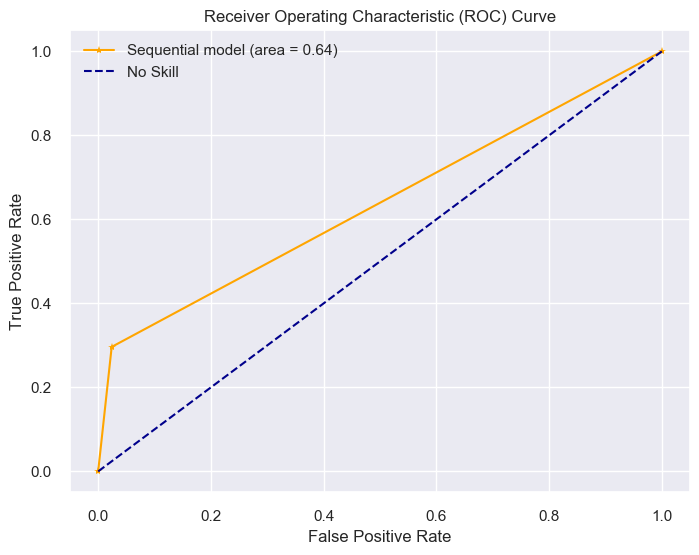

In [73]:
plt.plot(grid_search_roc_fpr, grid_search_roc_tpr, marker='*', label='Sequential model (area = %0.2f)' % grid_search_roc_auc, color='orange')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='No Skill') 
plt.title('Receiver Operating Characteristic (ROC) Curve') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [74]:
grid_search_precision, grid_search_recall, grid_search_thresholds = precision_recall_curve(y_test, y_pred_proba)

In [75]:
grid_search_precision_recall_auc= auc(grid_search_recall, grid_search_precision)
print(grid_search_precision_recall_auc)

0.6031803487240889


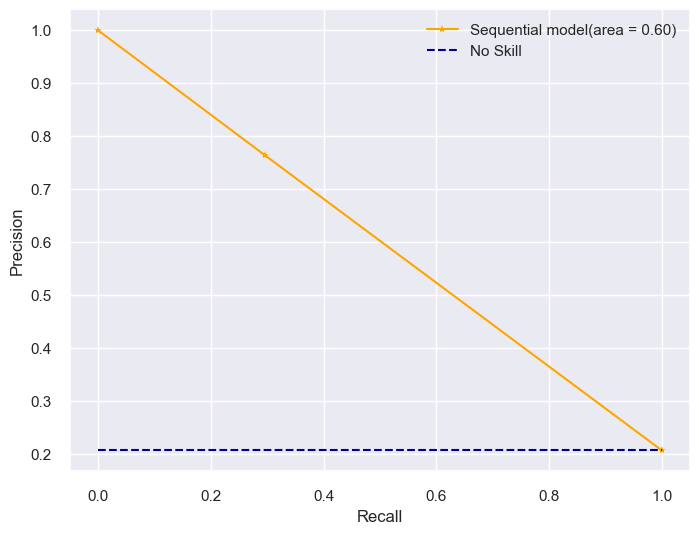

In [76]:
plt.plot(grid_search_recall, grid_search_precision, marker='*', label='Sequential model(area = %0.2f)' % grid_search_precision_recall_auc, color='orange')
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color='darkblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()